# Laplacian Associative Memory (LAM) - DEV 13

[Multiscale representations of community structures in attractor neural networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8412329/pdf/pcbi.1009296.pdf) (2021)

- Alpha variations using SOAM model

In [1]:
from nn import LAM
import libtools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# np.random.seed(123)

In [4]:
src = np.load('../data/mat/SOM_orient_v1.npy')
src = libtools.downsample(src, 4)

(51, 51)
Theta θ | min: 0.0012 max: 6.282


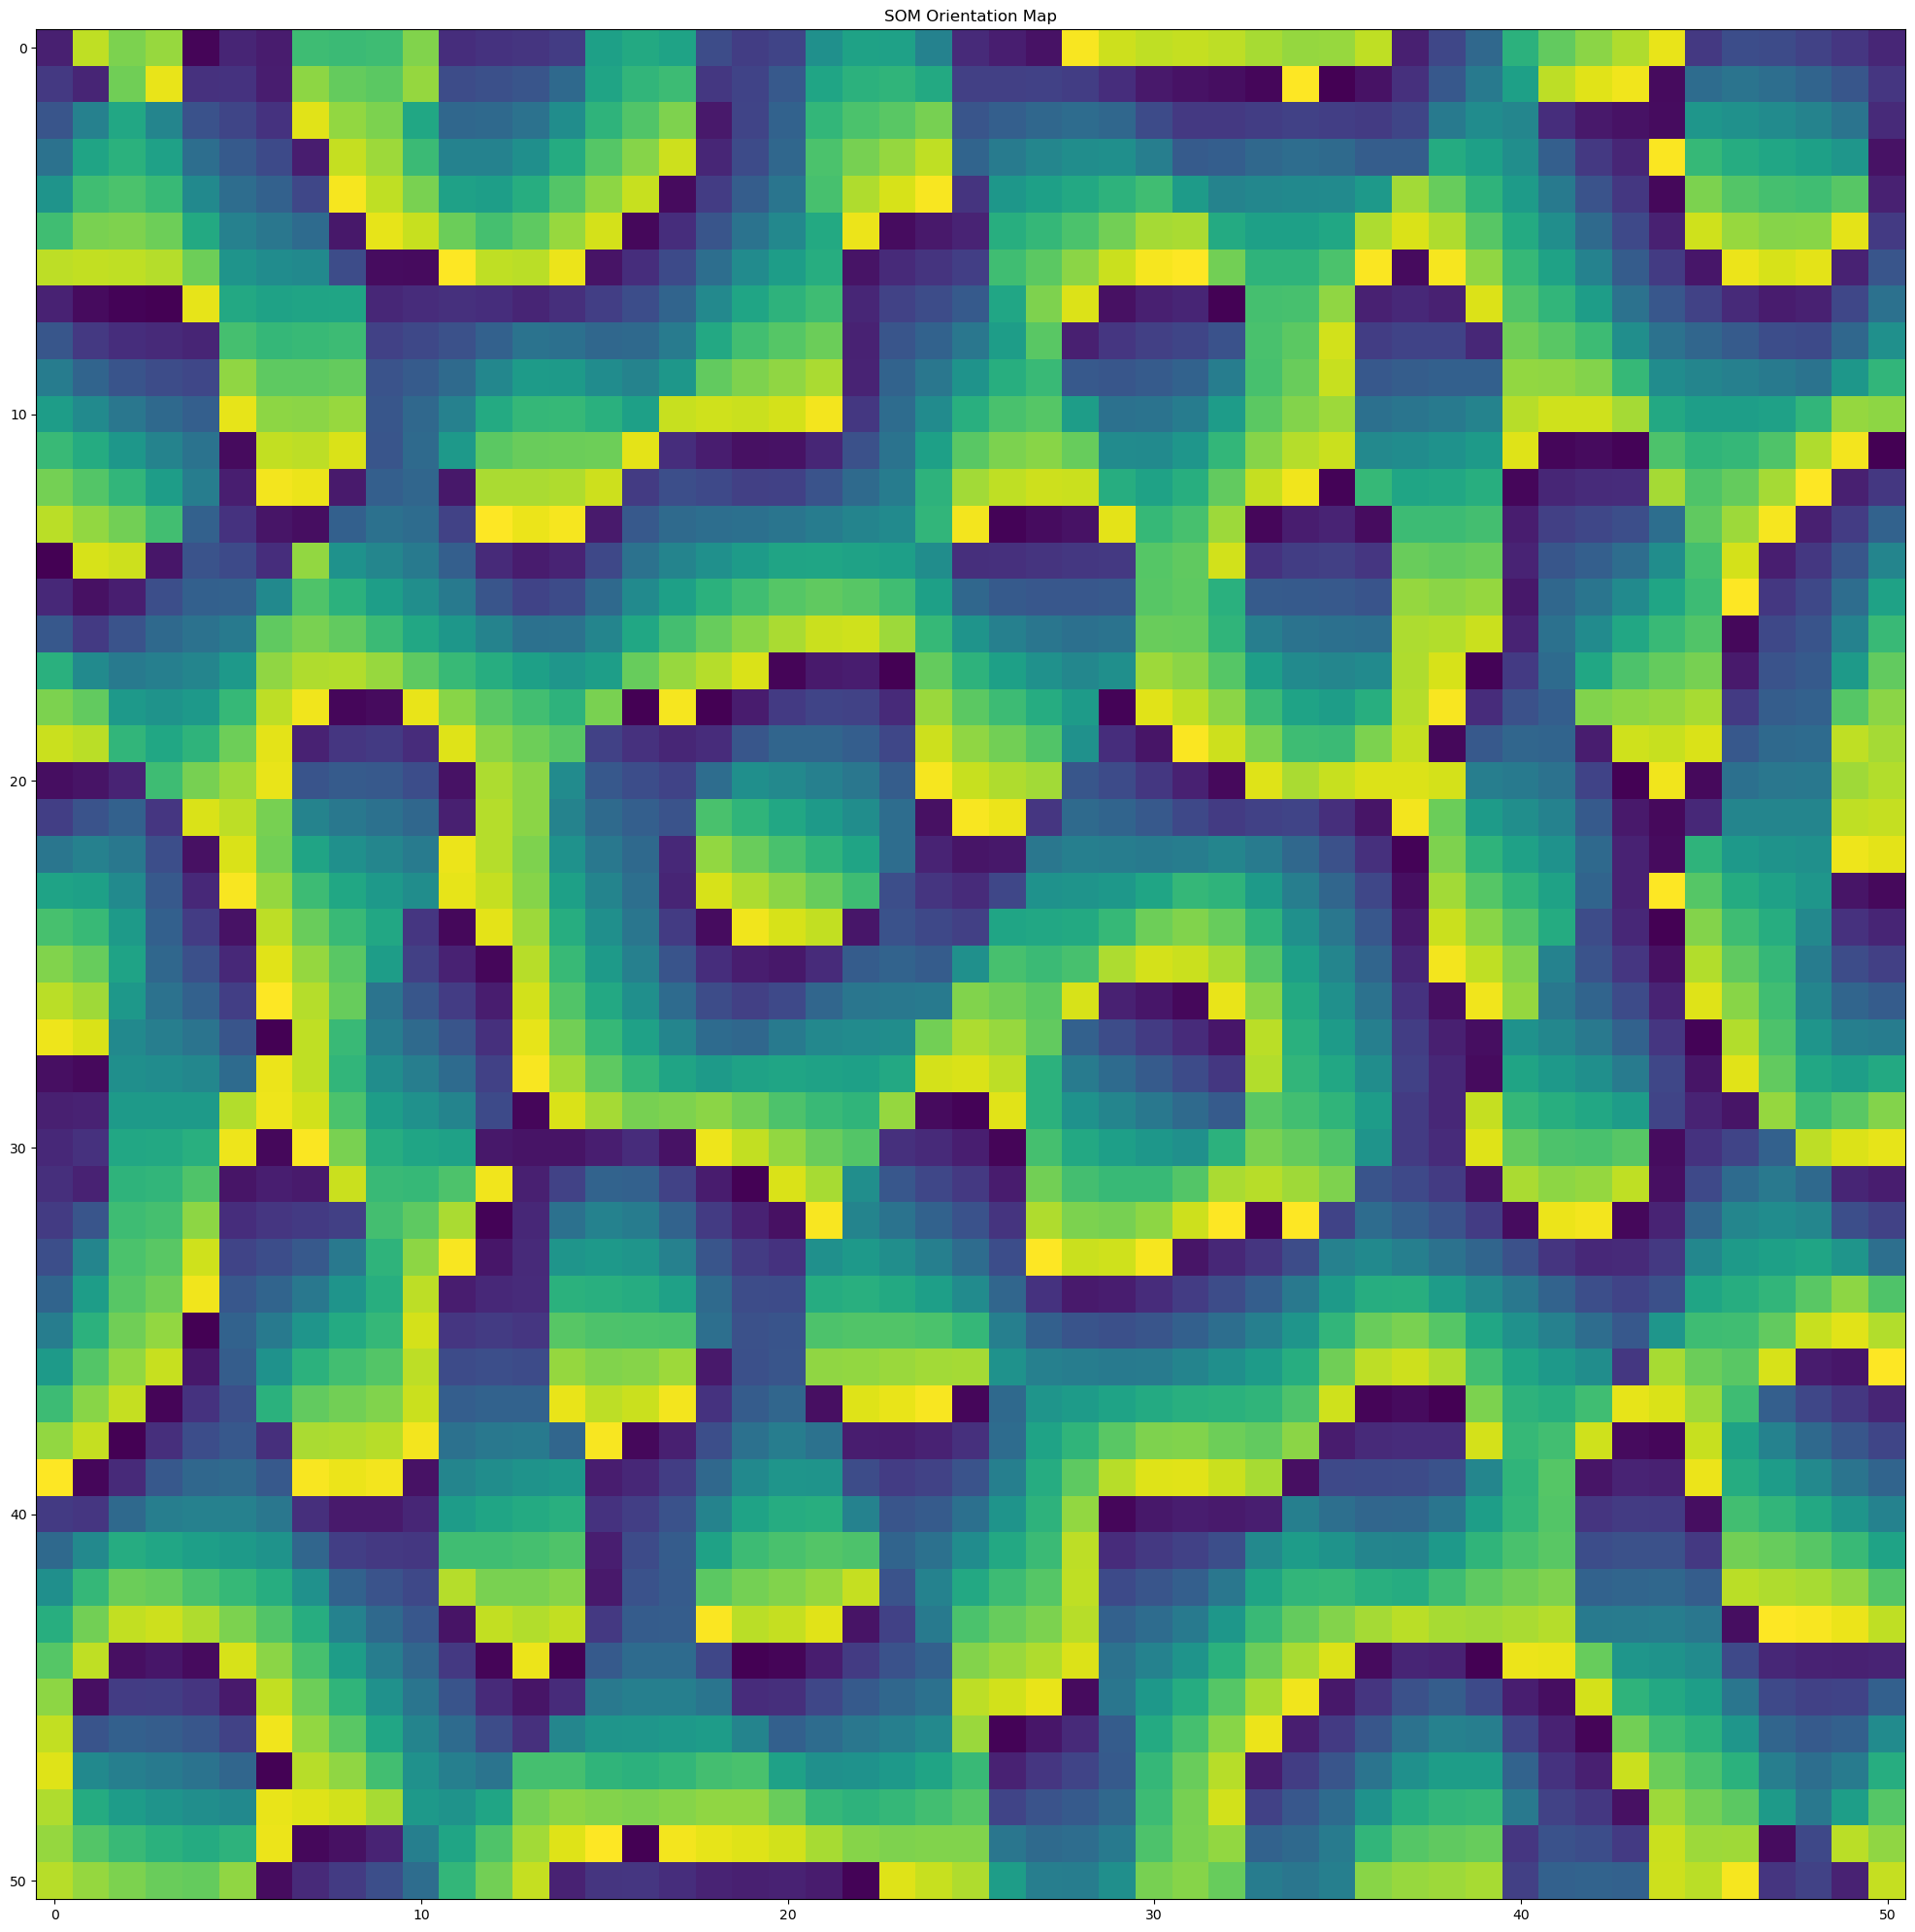

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(src)
plt.title('SOM Orientation Map')
plt.tight_layout()

print(src.shape)
print('Theta θ | min:', round(src.min(),4), 'max:', round(src.max(),4))

In [6]:
N = 8192                            # Neurons | Default: 30000
prob = 0.1                          # Sparsity
eta = 0.01                          # Epsilon / Learning rate
epochs = 3000                       # Steps
gamma = 0.6                         # Inhibition ratio
norm_mode = 'asym'                  # Asymmetric Normalisation
alpha = -0.9                        # Ratio between local and global inhibition
P = src.shape[0] * src.shape[1]     # N Nodes

a_arr = np.arange(-1.5, 1.5, 0.1)   # Alpha range

sigmaX = 4.0                        # Spatial Scale
sigmaA = 0.1                        # Angular Scale

# Init condition (Center cell)
start_node = int(int(src.shape[0]/2) * src.shape[1] + int(src.shape[0]/2))
print('Start node:', start_node)

# Malloc
a_hist, m_hist = [], []
obj_hist = np.zeros([len(a_arr), epochs])

Start node: 1300


In [7]:
W = libtools.construct_SOAM(src, sigmaX, sigmaA)

In [8]:
graph = LAM(N, P, prob, W, gamma, "asym") # Build model

In [9]:
for a_ind in tqdm(range(len(a_arr))):
    a = np.around(a_arr[a_ind], decimals=1) # Isolate (a) from array
    m_log, obj_log = graph.simulate_single(a, eta, epochs, start_node) # Simulate alpha
    m = m_log[-1,:] # Extract final row (epoch) from m_log

    # Append callbacks
    a_hist.append(a)
    m_hist.append(m)
    obj_hist[a_ind,:] = obj_log

100%|██████████| 30/30 [2:36:20<00:00, 312.67s/it]


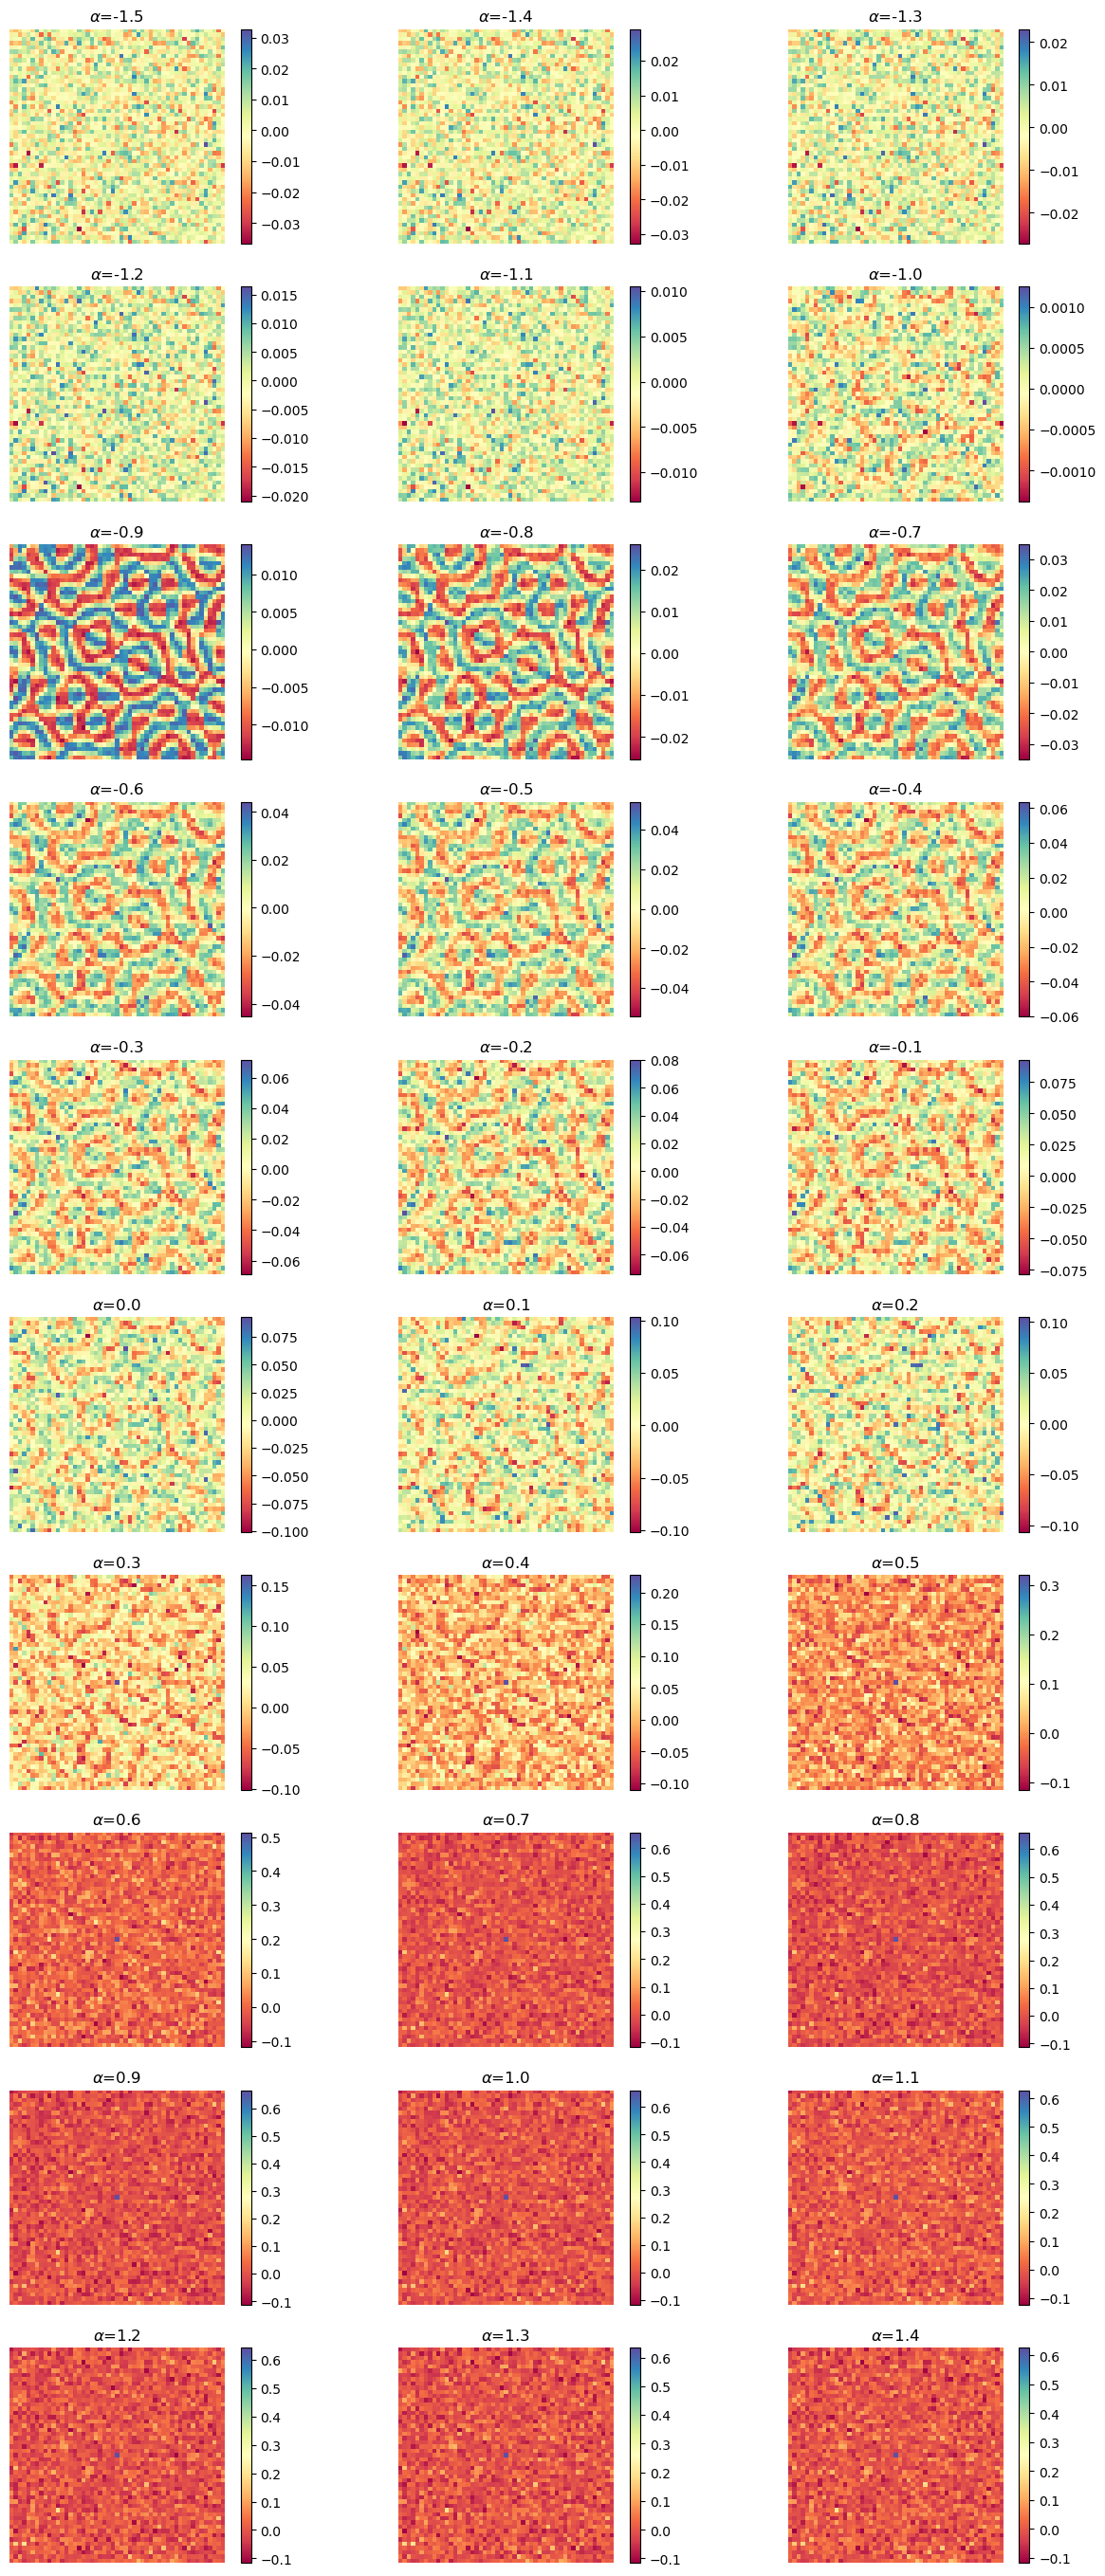

In [10]:
# Pattern overlaps obtained after the simulation of LAM at different *α* values
plt.figure(figsize=(15,70))
for a_ind in range(len(a_arr)):
    a = np.around(a_arr[a_ind], decimals=1)
    m = m_hist[a_ind]

    plt.subplot(20, 3, a_ind+1)
    plt.imshow(m.reshape(src.shape), cmap="Spectral", vmin=np.min(m), vmax=np.max(m))
    plt.axis("off"), plt.colorbar()
    plt.title(r"$\alpha$="+str(a))